In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

In [2]:
def f(x):
    return 2*np.sin(x) - np.cos(2*x)
def f_d(x):
    return 2*np.cos(x) + 2*np.sin(2*x)

In [13]:
def beauty_derivative_plot(p):
    x = np.linspace(-2*np.pi, 2*np.pi, 500)
    y = f(x)
    yd = f_d(x)
    px = p
    py = f(p)

    k = np.arctan(f_d(p))
    b = py - k*px
    x_new = np.linspace(p - 1, p + 1, 500)
    plt.figure(figsize=(10, 6))
    plt.plot(x,y, 'b-', label = 'f(x) = 2*np.sin(x) - np.cos(2*x)')
    plt.plot(x, yd, 'r--', label = "f'(x) = 2*np.cos(x) + 2*np.sin(2*x)")
    plt.plot(px,py,"ko")
    plt.plot(x_new, k*x_new + b, label = f"Tangent at x = {p}")

    xmin  = 0.5 + p  / 4 / np.pi
    ymin = py/plt.ylim()[1]
    plt.vlines(p, 0, f(p), colors='purple', linestyles='dashed', linewidth=1)
    plt.hlines(f(p), 0, p, colors='purple', linestyles='dashed', linewidth=1)

    plt.annotate(f"f'({p})= {round(f_d(p),2)}", xy=(px, py), xytext=(px+1.5,py+0.2),
                            color="black", fontsize=8,
                            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="black"))

    plt.title('Function, Derivative, and Tangent Line')
    plt.xlabel('х')
    plt.ylabel('у')
    plt.legend()
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()


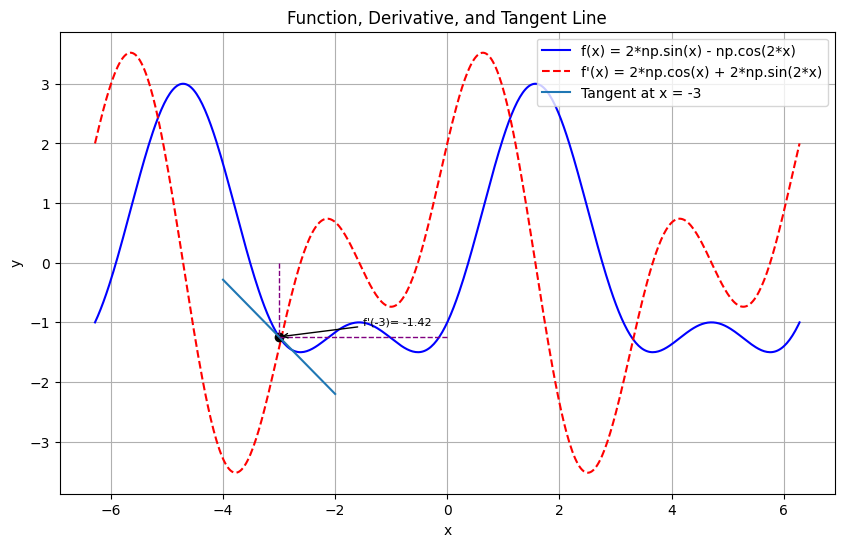

In [14]:
beauty_derivative_plot(-3)

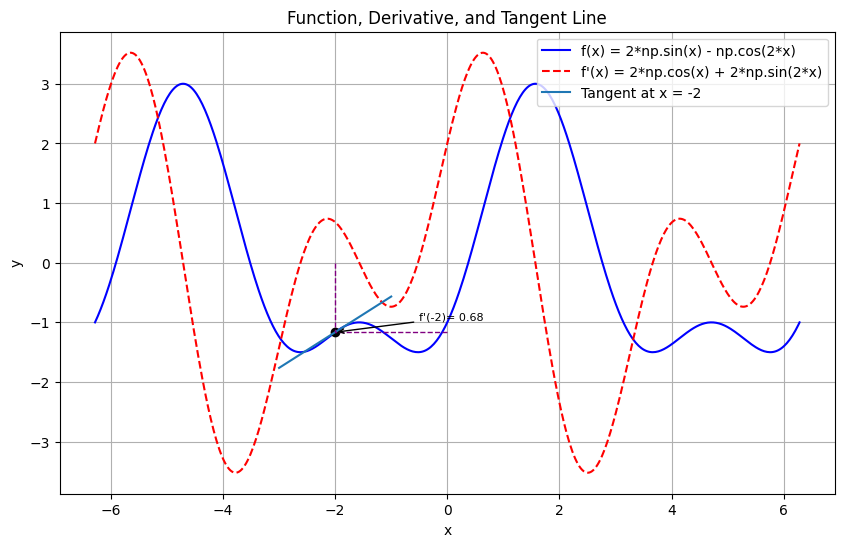

In [15]:
beauty_derivative_plot(-2)

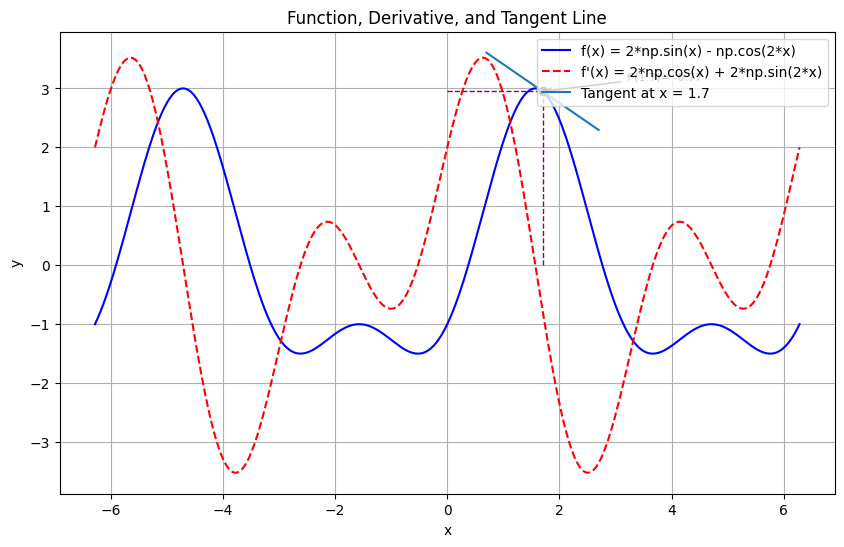

In [16]:
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

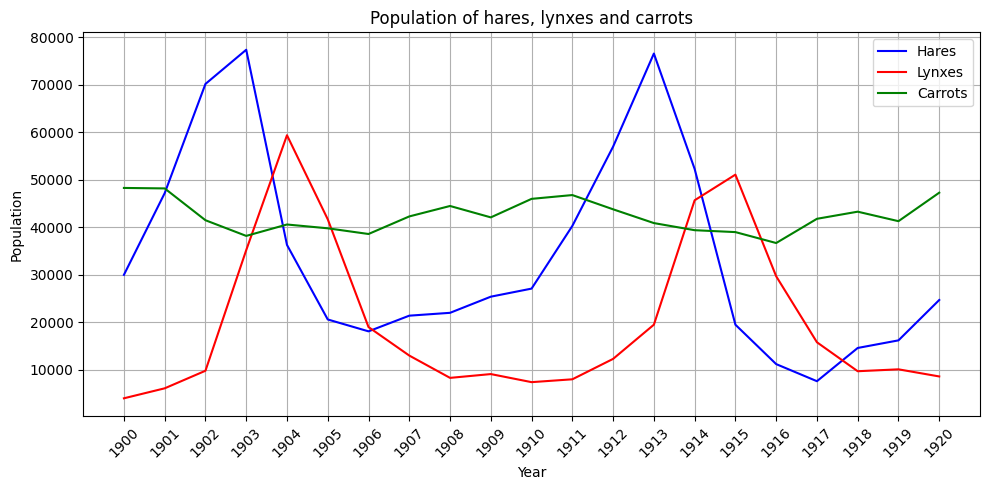

In [19]:
data = np.loadtxt('populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.figure(figsize=(10, 5))

plt.plot(years, hares, 'b-', label='Hares')
plt.plot(years, lynxes, 'r-', label='Lynxes')
plt.plot(years, carrots, 'g-', label='Carrots')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of hares, lynxes and carrots')

plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

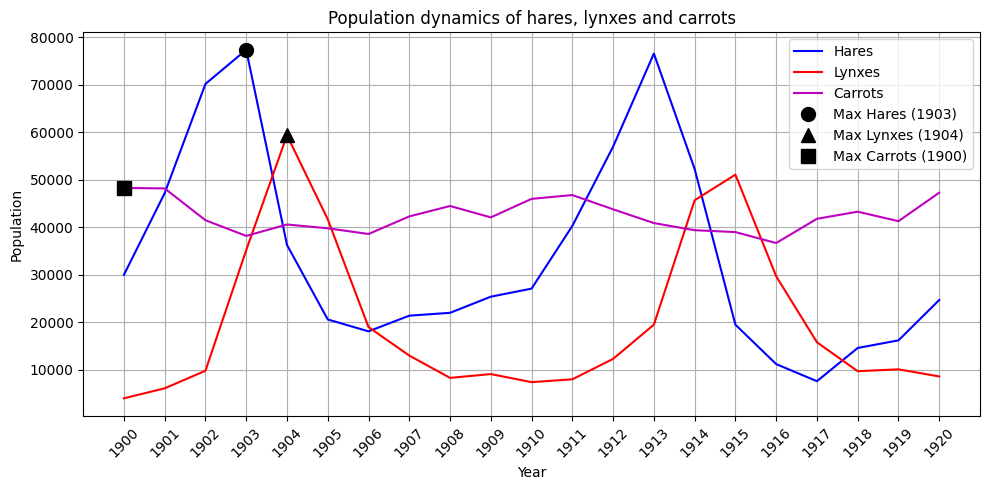

In [ ]:
max_h_id = np.argmax(hares)
max_l_id = np.argmax(lynxes)
max_c_id = np.argmax(carrots)

max_h_year = years[max_h_id]
max_l_year = years[max_l_id]
max_c_year = years[max_c_id]

plt.figure(figsize=(10, 5))

plt.plot(years, hares, 'b-', label='Hares')
plt.plot(years, lynxes, 'r-', label='Lynxes')
plt.plot(years, carrots, 'm-', label='Carrots')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population dynamics of hares, lynxes and carrots')

plt.plot(max_h_year, hares[max_h_id],'ko', markersize=10, label=f'Max Hares ({max_h_year:.0f})')
plt.plot(max_l_year, lynxes[max_l_id],'k^', markersize=10, label=f'Max Lynxes ({max_l_year:.0f})')
plt.plot(max_c_year, carrots[max_c_id],'ks', markersize=10, label=f'Max Carrots ({max_c_year:.0f})')

plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

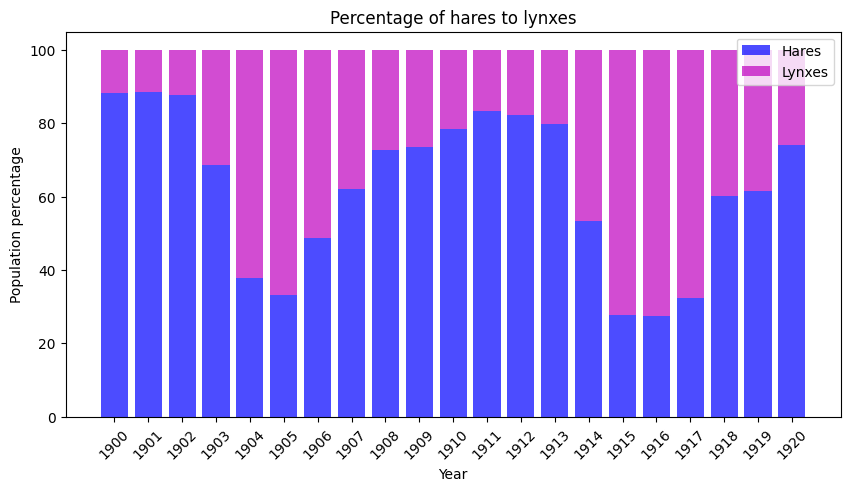

In [20]:
total = hares + lynxes

hare_pct = (hares / total) * 100
lynx_pct = (lynxes / total) * 100

plt.figure(figsize=(10, 5))

plt.bar(years, hare_pct, label='Hares', color='blue', alpha=0.7)
plt.bar(years, lynx_pct, bottom=hare_pct, label='Lynxes', color='m', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Population percentage')
plt.title('Percentage of hares to lynxes')
plt.xticks(years, rotation=45)

plt.legend()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

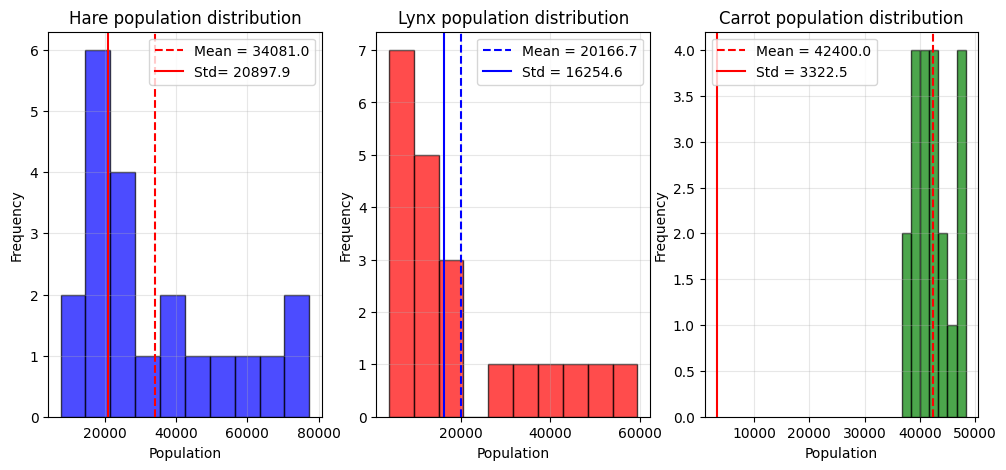

In [ ]:
hare_mean = np.mean(hares)
hare_std = np.std(hares)
lynx_mean = np.mean(lynxes)
lynx_std = np.std(lynxes)
carrot_mean = np.mean(carrots)
carrot_std = np.std(carrots)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

ax1.hist(hares, bins=10, color='blue', alpha=0.7, edgecolor='black')
ax1.axvline(hare_mean, color='red', linestyle='--', label=f'Mean = {hare_mean:.1f}')
ax1.axvline(hare_std, color='red', linestyle='-', label=f'Std= {hare_std:.1f}')
ax1.set_title('Hare population distribution')
ax1.set_xlabel('Population')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.hist(lynxes, bins=10, color='red', alpha=0.7, edgecolor='black')
ax2.axvline(lynx_mean, color='blue', linestyle='--', label=f'Mean = {lynx_mean:.1f}')
ax2.axvline(lynx_std, color='blue', linestyle='-', label=f'Std = {lynx_std:.1f}')
ax2.set_title('Lynx population distribution')
ax2.set_xlabel('Population')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)
ax2.legend()

ax3.hist(carrots, bins=7, color='green', alpha=0.7, edgecolor='black')
ax3.axvline(carrot_mean, color='red', linestyle='--', label=f'Mean = {carrot_mean:.1f}')
ax3.axvline(carrot_std, color='red', linestyle='-', label=f'Std = {carrot_std:.1f}')
ax3.set_title('Carrot population distribution')
ax3.set_xlabel('Population')
ax3.set_ylabel('Frequency')
ax3.grid(True, alpha=0.3)
ax3.legend()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

Dominant species each year:
['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


Text(0.5, 1.0, 'Proportion of years each species had larger population\n')

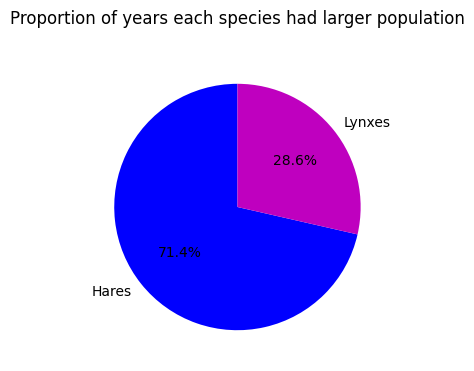

In [ ]:
dominant_species = np.where(hares > lynxes, 'H', 'L')

print("Dominant species each year:")
print(list(dominant_species))

hare_dominant_years = np.sum(dominant_species == 'H')
lynx_dominant_years = np.sum(dominant_species == 'L')
total_years = len(dominant_species)

hare_pct = (hare_dominant_years / total_years) * 100
lynx_pct = (lynx_dominant_years / total_years) * 100

labels = ['Hares', 'Lynxes']
sizes = [hare_dominant_years, lynx_dominant_years]
colors = ['b', 'm']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of years each species had larger population\n')

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

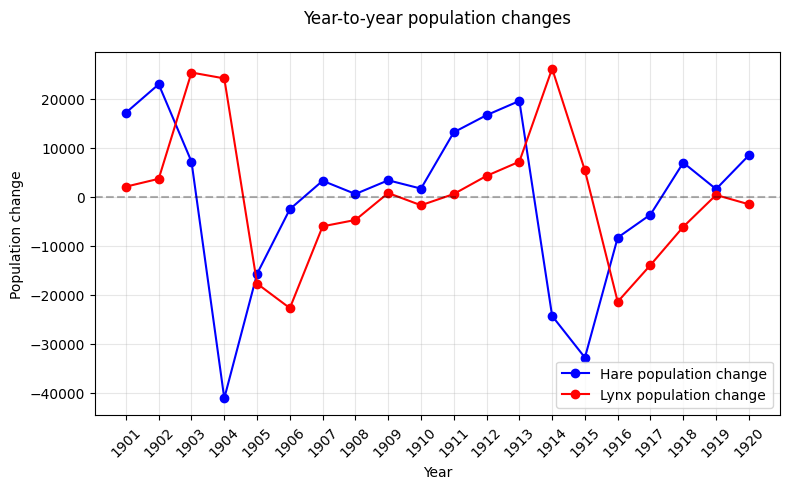

Hares and lynxes (Correlation: -0.178)


In [22]:
hare_changes = np.diff(hares)
lynx_changes = np.diff(lynxes)
change_years = years[1:]

correlation = np.corrcoef(hare_changes, lynx_changes)[0,1]
plt.figure(figsize=(8, 5))

plt.plot(change_years, hare_changes, 'b-', label='Hare population change', marker='o')
plt.plot(change_years, lynx_changes, 'r-', label='Lynx population change', marker='o')

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)

plt.xlabel('Year')
plt.ylabel('Population change')
plt.title('Year-to-year population changes\n')

plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(change_years, rotation=45)
plt.tight_layout()
plt.show()

print(f'Hares and lynxes (Correlation: {correlation:.3f})')

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

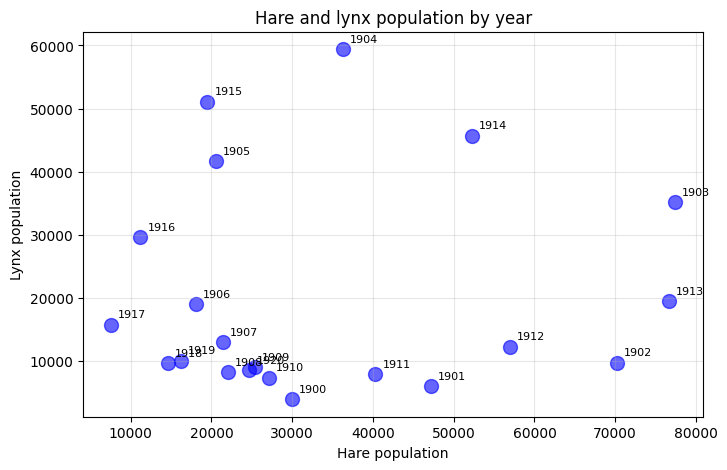

In [ ]:
plt.figure(figsize=(8, 5))

plt.scatter(hares, lynxes, c='blue', alpha=0.6, s=100)
for i, year in enumerate(years):
    plt.annotate(f'{year:.0f}', (hares[i], lynxes[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Hare population')
plt.ylabel('Lynx population')
plt.title('Hare and lynx population by year')

plt.grid(True, alpha=0.3)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [23]:
indices = np.where((data[:, 0] == 1918) | (data[:, 0] == 1919))
estimated_hare_population = np.mean(data[indices, 1])
true_hare_population = data[np.argmin(data[:, 0] == 1920), 1]

error_ratio = np.abs(estimated_hare_population - true_hare_population) / true_hare_population

print("Estimated hare population in 1920: {}".format(estimated_hare_population))
print("True hare population in 1920: {}".format(true_hare_population))
print("Error ratio: {:.4f}".format(error_ratio))

Estimated hare population in 1920: 15400.0
True hare population in 1920: 30000.0
Error ratio: 0.4867
